## Maternal Age and Smoking: Effects on Infant Birth Weight

This project explores how maternal characteristics, specifically *age* and *smoking status*, influence infant birth weight and gestational duration. Using a dataset of 1,165 birth records, the analysis examines whether smoking during pregnancy is associated with lower birth weights and shorter gestation periods, and whether maternal age affects these outcomes. Employing **simulation-based hypothesis testing and bootstrap confidence intervals**, this study quantifies sampling variability and evaluates the strength of observed differences. By integrating statistical inference with visual data exploration in Python, the project demonstrates how modern data-science methods can illuminate public-health trends related to maternal behavior and infant health.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


**Hypothesis testing simulation using randomization (permutation) methods**

Null Hypothesis (H₀): The true proportion of correct outcomes = 0.5.

Alternative Hypothesis (H₁): The true proportion of correct outcomes ≠ 0.5.


This code runs a simulation to test whether the observed proportion of correct outcomes (18 out of 24) could occur by chance if the true probability were 0.5. It compares the observed statistic to 10,000 simulated values and calculates the p-value, showing how extreme the observed result is under the null model.

In [3]:
model_proportions = make_array(0.5, 0.5)

def statistic(expected_prop, actual_prop):
    return 100*abs(expected_prop - actual_prop)

observed_statistic = statistic(0.5, 18/24)

def simulation_and_statistic(model_proportions, expected_proportion_correct):
       
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    one_statistic = statistic(simulation_proportion_correct.item(0), expected_proportion_correct)
    
    return one_statistic

In [4]:
simulated_statistics = make_array()
num_simulations = 10000

for i in np.arange(num_simulations):
    simulated_statistic = simulation_and_statistic(model_proportions, 0.5)
    simulated_statistics = np.append(simulated_statistics, simulated_statistic)

p-value:   0.0231


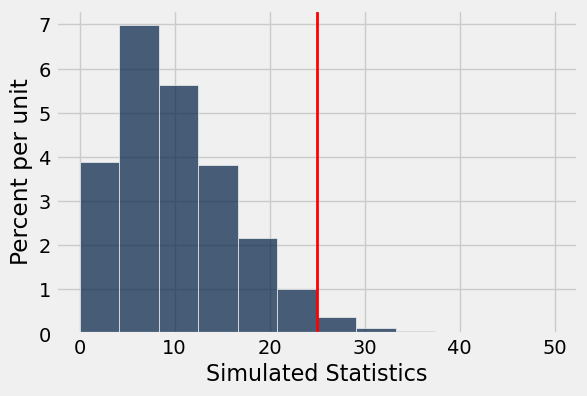

In [5]:
Table().with_column('Simulated Statistics', simulated_statistics).hist(bins = np.arange(0, 50, 4.16))
plots.axvline(observed_statistic, color='red', lw=2);

print("p-value:  ", sum(simulated_statistics >= observed_statistic)/num_simulations)

Conclusion: The simulation compares the observed statistic (18/24) to the distribution expected under chance. A small p-value would indicate that the observed proportion is unlikely under H₀, suggesting evidence that the true proportion differs from 0.5.

**Bootstrap Confidence Interval for Proportion**

Null Hypothesis (H₀): The true proportion of correct outcomes = 0.5.

Alternative Hypothesis (H₁): The true proportion of correct outcomes ≠ 0.5.

This code performs a bootstrap simulation for a sample proportion to create a 95% confidence interval for the proportion of correct outcomes (18 out of 24). It repeatedly resamples the data to estimate the variability of the sample proportion, then plots the bootstrap distribution with the confidence interval and the hypothesized proportion (0.5) for comparison.

In [6]:
sample_pc_proportions = (18/24, 6/24)

def bootstrap_baby_proportions(size, distributions):
    return sample_proportions(size, distributions).item(0)

bootstrap_pc = make_array()

for i in np.arange(10000):
    new_bootstrap_pc = bootstrap_baby_proportions(24, sample_pc_proportions)
    bootstrap_pc = np.append(bootstrap_pc, new_bootstrap_pc) #bootstramp sample size is always the same as original


In [8]:
left_pc_95 = percentile(2.5, bootstrap_pc)
right_pc_95 = percentile(97.5, bootstrap_pc)
left_pc_95, right_pc_95

(0.58333333333333337, 0.91666666666666663)

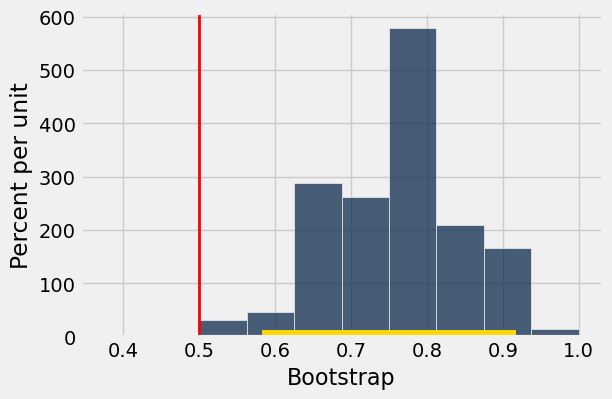

In [9]:
Table().with_column(
    'Bootstrap', bootstrap_pc
).hist()

plots.plot([left_pc_95,right_pc_95], [0,0], color="gold", lw=10, zorder=1);
plots.axvline(0.5, color='red', lw=2);

Conclusion: The 95% confidence interval from the bootstrap simulation estimates the likely range of the true proportion. If 0.5 lies outside this range, we reject H₀ and conclude that the true proportion likely differs from 0.5.

**Bootstrap resampling for confidence intervals - Mean**

Null Hypothesis (H₀): The population mean maternal age equals the sample mean (no significant difference).

Alternative Hypothesis (H₁): The population mean maternal age differs from the sample mean.

This code uses bootstrapping to estimate the sampling distribution of the mean maternal age by repeatedly resampling the data with replacement. It then constructs a 95% confidence interval for the true population mean based on the percentiles of the simulated means.

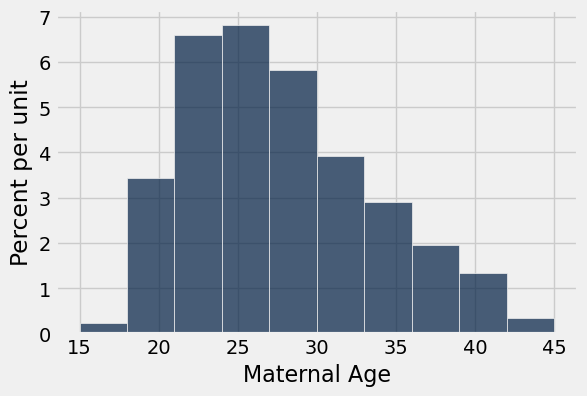

In [10]:
births.hist('Maternal Age')

In [11]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [12]:
def bootstrap_mean():
    '''samples with replacement from our sample, returns the mean maternal age of this bootstrap sample'''
    return np.mean(births.sample().column('Maternal Age'))

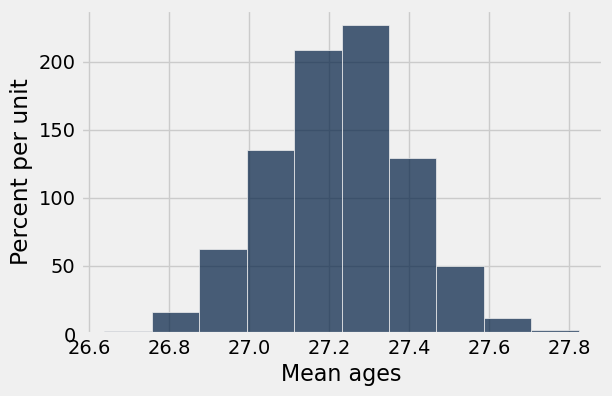

In [13]:
mean_ages = make_array()

for i in np.arange(1000):
    mean_ages = np.append(mean_ages, bootstrap_mean())

mean_ages_table = Table().with_columns('Mean ages', mean_ages)
mean_ages_table.hist()

In [14]:
upperbound = percentile(97.5, mean_ages)
lowerbound = percentile(2.5, mean_ages)
upperbound, lowerbound

(27.565587734241909, 26.88756388415673)

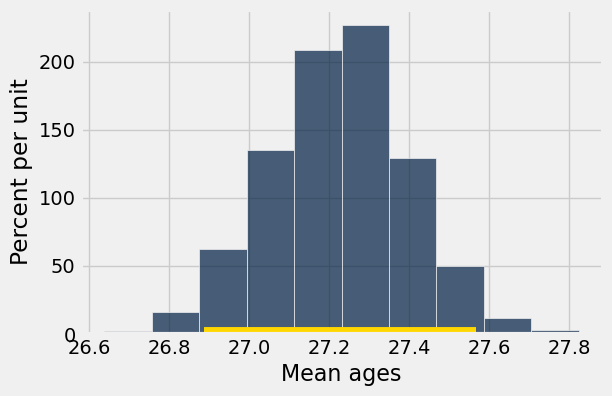

In [15]:
mean_ages_table = Table().with_columns('Mean ages', mean_ages)
mean_ages_table.hist()
plots.plot([lowerbound, upperbound], [0, 0], color = 'gold', lw = 10)

Conclusion: The 95% bootstrap confidence interval provides an estimated range for the true mean maternal age. If a hypothesized population mean falls outside this interval, it suggests that the true mean is significantly different.